### Classification of fake job postings

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../data/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Exploring the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.shape

(17880, 18)

NULLs/NAs in the dataset

In [5]:
print("NA's percentages per column")
100*df.isna().sum()/df.shape[0]

NA's percentages per column


job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

Feature: Title

---

In [6]:
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [7]:
df['description'].values[0]

'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff'

In [8]:
print(f"Unique values pct over total rows: {100*len(df['title'].unique())/df.shape[0]:.2f}%")

Unique values pct over total rows: 62.81%


Determining Job titles per industry

In [9]:
jobs_industry = df[['industry','title']].value_counts().reset_index().sort_values(by = ['industry','title'], ascending=[True,False])
jobs_industry[:3]

,industry,title,count
6453,Accounting,social media executive,1
6454,Accounting,customer service representative,1
6455,Accounting,customer service,1


As observed, theres a lot of unique job names but the titles can still be reduced since some jobs like "customer service representive", "customer service" could be tagged as "customer service".

Feature: Location 

---

In [10]:
print(f"Unique values pct over total rows: {100*len(df['location'].unique())/df.shape[0]:.2f}%, total unique values {df['location'].nunique()}")

Unique values pct over total rows: 17.37%, total unique values 3105


In [11]:
print(df['location'].apply(lambda x: (x.split(','))[2] if pd.notnull(x) and len(x.split(',')) > 2 else x).nunique())
df['location'].apply(lambda x: f"{(x.split(','))[2]}_{(x.split(','))[0]}" if pd.notnull(x) and len(x.split(',')) > 2 else x)

2350


0             New York_US
1             Auckland_NZ
2                Wever_US
3           Washington_US
4           Fort Worth_US
               ...       
17875          Toronto_CA
17876     Philadelphia_US
17877          Houston_US
17878            Lagos_NG
17879       Wellington_NZ
Name: location, Length: 17880, dtype: object

Even by considering cities only, the unique values reduces to 2350 from 3105. Its still a lot. 

Feature: Department

---

In [12]:
print(f"Unique values pct over total rows: {100*len(df['department'].unique())/df.shape[0]:.2f}%, total unique values {df['location'].nunique()}")

Unique values pct over total rows: 7.48%, total unique values 3105


In [13]:
df['department'].unique().tolist()

['Marketing',
 'Success',
 nan,
 'Sales',
 'ANDROIDPIT',
 'HR',
 ' R&D',
 'Engagement',
 'Businessfriend.com',
 'Medical',
 'Field',
 'All',
 'Design',
 'Production',
 'ICM',
 'General Services',
 'Engineering',
 'IT',
 'Business Development',
 'Human Resources',
 'Oil & Energy',
 'Marketplace',
 'Cloud Services',
 'FP',
 'Client Services',
 'Operations',
 'Materials',
 'tech',
 'Sales and Business Development',
 'R&D',
 'Development',
 'Incubation Services',
 'Field Operations',
 'MKT',
 'Technology',
 'Power Plant & Energy',
 'Approvals Department',
 'Playfair Capital',
 'Development ',
 'Tech',
 'Software development',
 'Media',
 'Line-Up',
 'Management',
 'Squiz ',
 'Finance',
 'Financial',
 'Retail',
 'Marketing and Communications',
 'Research',
 'Connectivity',
 'PMO',
 'Product',
 'Student Beans Mag',
 'Information Technology Group',
 'DTVMA',
 'G&A',
 'Implementations',
 'OPS',
 'Partnership Management',
 'Professional Services',
 'Customer Care',
 'Account Management',
 'EC',


Looking at only city parts only, it gave us lower distinct values compared to whole location data.

Feature: Salary Range

---

In [14]:
sorted(df['salary_range'].astype(str).unique().tolist())

['0-0',
 '0-1',
 '0-1000',
 '0-100000',
 '0-110406',
 '0-115',
 '0-120000',
 '0-1200000',
 '0-12500',
 '0-130000',
 '0-15000',
 '0-150000',
 '0-16000',
 '0-180000',
 '0-2000',
 '0-20000',
 '0-24000',
 '0-25000',
 '0-268',
 '0-30000',
 '0-32000',
 '0-34300',
 '0-35000',
 '0-38000',
 '0-43500',
 '0-45000',
 '0-48000',
 '0-50000',
 '0-60000',
 '0-65000',
 '0-70000',
 '0-90000',
 '0-92000',
 '0-9360000',
 '0-95000',
 '10-Nov',
 '10-Oct',
 '100-120',
 '100-150',
 '100-200',
 '1000-1000',
 '1000-10000',
 '1000-1100',
 '1000-1400',
 '1000-1500',
 '1000-2000',
 '1000-20000',
 '1000-26000',
 '1000-3000',
 '1000-4000',
 '1000-5000',
 '1000-6000',
 '10000-10000',
 '10000-100000',
 '10000-12000',
 '10000-120000',
 '10000-14000',
 '10000-15000',
 '10000-16000',
 '10000-18000',
 '10000-20000',
 '10000-22000',
 '10000-25000',
 '10000-250000',
 '10000-30000',
 '100000-110000',
 '100000-115000',
 '100000-117000',
 '100000-120000',
 '100000-125000',
 '100000-130000',
 '100000-150000',
 '100000-160000',


It seems like the data of salary range is not clean so we will handle and tag data such as "dec-25", Oct-20" of "invalid_salary_data"

In [15]:
df['salary_range'].fillna('no_salary_data').apply(lambda salary: 'invalid_salary_data' if (str(salary) == '0-0') or (any(x.isalpha() for x in str(salary)) and salary != 'no_salary_data') else salary).value_counts()

salary_range
no_salary_data         15012
invalid_salary_data      168
40000-50000               66
30000-40000               55
45000-67000               37
                       ...  
15-25                      1
60-75                      1
300000-325000              1
27500-36000                1
3700-3800                  1
Name: count, Length: 860, dtype: int64

It seems there are a lot of NULLs and only 168 invalid salary data.

Feature: Benefits

---

In [16]:
print(f"Unique values pct over total rows: {100*len(df['benefits'].unique())/df.shape[0]:.2f}%, total unique values {df['location'].nunique()}")

Unique values pct over total rows: 34.70%, total unique values 3105


In [17]:
print(f"NULL values pct over total rows: {100*df['benefits'].isna().sum()/df.shape[0]:.2f}%")

NULL values pct over total rows: 40.34%


In [18]:
df['benefits'].unique().tolist()[:5]

[nan,
 'What you will get from usThrough being part of the 90 Seconds team you will gain:experience working on projects located around the world with an international brandexperience working with a variety of clients and on a large range of projectsopportunity to drive and grow production function and teama positive working environment with a great teamPay$40,000-$55,000Applying for this role with a VIDEOBeing a video business, we understand that one of the quickest ways that we can assess your suitability for this role, and one of the quickest ways that you can apply for it, is for you to submit a 60-90 second long video telling us about yourself, your experience and why you think you would be perfect for the role. \xa0It’s not about being a filmmaker or making a really creative video. \xa0A simple video filmed with a smart phone or web cam will be fine. Please also include where you are based and when you can start.You can upload the video onto YouTube or Vimeo (or similar) as a Draf

Benefits columns is also a text-document column.

Feature: Telecommuting

---

In [19]:
100*df['telecommuting'].value_counts()/df.shape[0]

telecommuting
0    95.710291
1     4.289709
Name: count, dtype: float64

4.28% percent of the data are telecommuting jobs.

Feature: has_company_logo

---

In [20]:
100*df['has_company_logo'].value_counts()/df.shape[0]

has_company_logo
1    79.530201
0    20.469799
Name: count, dtype: float64

79.53% of the data has company logo 

Feature: has_questions

---

In [21]:
100*df['has_questions'].value_counts()/df.shape[0]

has_questions
0    50.82774
1    49.17226
Name: count, dtype: float64

Feature: employment_type

---

In [22]:
df['employment_type'].value_counts()

employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

In [23]:
print(f"NULL values pct over total rows: {100*df['employment_type'].isna().sum()/df.shape[0]:.2f}%")

NULL values pct over total rows: 19.41%


Feature: required_experience

---

In [24]:
100*df['required_experience'].value_counts()/df.shape[0]

required_experience
Mid-Senior level    21.303132
Entry level         15.083893
Associate           12.846756
Not Applicable       6.241611
Director             2.175615
Internship           2.130872
Executive            0.788591
Name: count, dtype: float64

In [25]:
print(f"NULL values pct over total rows: {100*df['required_experience'].isna().sum()/df.shape[0]:.2f}%")

NULL values pct over total rows: 39.43%


Feature: required_education

---

In [26]:
100*df['required_education'].value_counts()/df.shape[0]

required_education
Bachelor's Degree                    28.775168
High School or equivalent            11.633110
Unspecified                           7.813199
Master's Degree                       2.326622
Associate Degree                      1.532438
Certification                         0.950783
Some College Coursework Completed     0.570470
Professional                          0.413870
Vocational                            0.274049
Some High School Coursework           0.151007
Doctorate                             0.145414
Vocational - HS Diploma               0.050336
Vocational - Degree                   0.033557
Name: count, dtype: float64

In [27]:
print(f"NULL values pct over total rows: {100*df['required_education'].isna().sum()/df.shape[0]:.2f}%")

NULL values pct over total rows: 45.33%


Feature: Industry

---

In [28]:
100*df['industry'].value_counts()/df.shape[0]

industry
Information Technology and Services    9.697987
Computer Software                      7.695749
Internet                               5.939597
Marketing and Advertising              4.630872
Education Management                   4.597315
                                         ...   
Shipbuilding                           0.005593
Sporting Goods                         0.005593
Museums and Institutions               0.005593
Wine and Spirits                       0.005593
Ranching                               0.005593
Name: count, Length: 131, dtype: float64

In [29]:
print(f"NULL values pct over total rows: {100*df['industry'].isna().sum()/df.shape[0]:.2f}%")

NULL values pct over total rows: 27.42%


Feature: Function

---

In [30]:
100*df['function'].value_counts()/df.shape[0]

function
Information Technology    9.781879
Sales                     8.210291
Engineering               7.539150
Customer Service          6.873602
Marketing                 4.642058
Administrative            3.523490
Design                    1.901566
Health Care Provider      1.890380
Other                     1.817673
Education                 1.817673
Management                1.772931
Business Development      1.275168
Accounting/Auditing       1.185682
Human Resources           1.146532
Project Management        1.023490
Finance                   0.961969
Consulting                0.805369
Writing/Editing           0.738255
Art/Creative              0.738255
Production                0.648770
Product Management        0.637584
Quality Assurance         0.620805
Advertising               0.503356
Business Analyst          0.469799
Data Analyst              0.458613
Public Relations          0.425056
Manufacturing             0.413870
General Business          0.380313
Research   

In [31]:
print(f"NULL values pct over total rows: {100*df['function'].isna().sum()/df.shape[0]:.2f}%")

NULL values pct over total rows: 36.10%


Company profile, description, requirements are text-document data.

In [32]:
100*df[['description','company_profile','requirements']].isna().sum()/df.shape[0]

description         0.005593
company_profile    18.501119
requirements       15.078300
dtype: float64

### Fraudulent Jobs

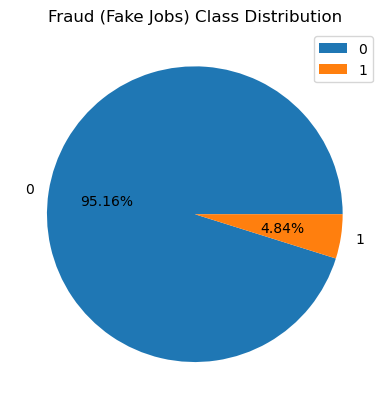

In [33]:
plt.pie(df['fraudulent'].value_counts(), labels=df['fraudulent'].unique(), autopct='%.2f%%')
plt.title('Fraud (Fake Jobs) Class Distribution')
plt.legend(loc = 'upper right')
plt.show()

Remarks: Class imbalanced, skewed distribution of negative class.

#### Pre-processing of Data 

Initially, we discovered that there are columns that contains high NULL values. Therefore, we need to impute data for NULLs. The idea is to combine all columns/features, since a job posting can be treated as a single document of words. An example of our simple imputation for null values would be like "no_salary_indicated" for salary_range with NULL values. Hence, the same principle will be applied to the rest of the columns.

In [34]:
# Create a function for pre-processing NULLS.
def preprocess_na(dataframe, target='fraudulent'):
    data = dataframe.copy()
    dataframe_copy = data.drop([target, 'job_id'], axis = 1)
    # Transformation of columns
    dataframe_copy['title'] = dataframe_copy['title'].fillna('no_job_title_indicated')
    dataframe_copy['location'] = dataframe_copy['location'].apply(lambda x: f"{((x.split(','))[2]).replace(' ','')}_{(x.split(','))[0]}" if pd.notnull(x) and len(x.split(',')) > 2 else x).fillna('no_job_location_indicated')
    dataframe_copy['department'] = dataframe_copy['department'].fillna('no_department_indicated')
    dataframe_copy['salary_range'] = dataframe_copy['salary_range'].fillna('no_salary_indicated').apply(lambda salary: 'invalid_salary_data' if (str(salary) == '0-0') or (any(x.isalpha() for x in str(salary)) and salary != 'no_salary_data') else salary)
    dataframe_copy['company_profile'] = dataframe_copy['title'].fillna('no_company_profile_indicated')
    dataframe_copy['description'] = dataframe_copy['title'].fillna('no_description_indicated')
    dataframe_copy['benefits'] = dataframe_copy['title'].fillna('no_benefits_indicated')
    dataframe_copy['telecommuting'] = dataframe_copy['telecommuting'].apply(lambda x: 'telecommuting_yes' if x == 1 else 'telecommuting_no').fillna('no_telecommuting_indicated')
    dataframe_copy['has_company_logo'] = dataframe_copy['has_company_logo'].apply(lambda x: 'has_company_logo_yes' if x == 1 else 'has_company_logo_no').fillna('no_has_company_logo_indicated')
    dataframe_copy['has_questions'] = dataframe_copy['has_questions'].apply(lambda x: 'has_questions_yes' if x == 1 else 'has_questions_no').fillna('no_has_questions_indicated')
    dataframe_copy['employment_type'] = dataframe_copy['employment_type'].fillna('no_employment_type_indicated')
    dataframe_copy['required_education'] = dataframe_copy['required_education'].fillna('no_required_education_indicated')
    dataframe_copy['industry'] = dataframe_copy['industry'].fillna('no_industry_indicated')
    dataframe_copy['function'] = dataframe_copy['function'].fillna('no_function_indicated')
    dataframe_copy['job_description'] = dataframe_copy.apply(lambda row: ' '.join(row.values.astype(str)), axis = 1)
    return data['fraudulent'], dataframe_copy['job_description']


### Next Layer of Pre-processing whole document
1. Applying Lowercase to the whole document to standardize the format. 
2. Removal of StopWords.
3. Removal of Non-Alphanumeric Characters.
4. Lemmatization. Lemmatize words to reduce them into their base form. Example: "Applying --> Apply"

### Feature Engineering
1. Using TF-IDF with n-gram option of unigram to bigram

In [35]:
import nltk
import spacy
import subprocess
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import re
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [36]:
def preprocess_docs(document_col):
    # NLTK
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    # Spacy
    try: 
        nlp_spacy = spacy.load('en_core_web_sm')
    except OSError:
        print('Spacy model not found. Downloading now.')
        subprocess.run(['python', '-m', 'spacy', 'download', 'en_core_web_sm'], check=True)
        nlp_spacy = spacy.load('en_core_web_sm')

    document_col = document_col.fillna('').replace('\n','').apply(lambda doc: ' '.join([token.lemma_ for token in nlp_spacy(doc)]))
    document_col = document_col.str.lower().apply(word_tokenize)
    document_col = document_col.apply(lambda doc: [token for token in doc if token.isalnum()])
    stop_words = set(stopwords.words('english'))
    document_col = document_col.apply(lambda doc: [token for token in doc if token not in stop_words])
    document_col = document_col.apply(lambda doc: ' '.join(doc))
    return document_col

def feature_engineering_tfidf(document_col):
    tfidf_class = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=0.05)
    X_vectors = tfidf_class.fit_transform(document_col)
    X_dataframe = pd.DataFrame(X_vectors.toarray(), columns = tfidf_class.get_feature_names_out())
    # Dump Training TF-IDF pickle file
    with open('../model/tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(tfidf_class, f)
    return X_dataframe


def feature_engineering_countVect(document_col):
    countVect_class = CountVectorizer(ngram_range=(1,1), max_df=0.6, min_df=0.05)
    X_vectors = countVect_class.fit_transform(document_col)
    X_dataframe = pd.DataFrame(X_vectors.toarray(), columns = countVect_class.get_feature_names_out())
    # Dump Training Count Vectorizer pickle file
    with open('../model/count_vectorizer.pkl', 'wb') as f:
        pickle.dump(countVect_class, f)
    return X_dataframe
    

#### Train-Test Split

### Data Preparation: Splitting The Data

In [37]:
# Train
y, docs_series = preprocess_na(df)
docs_series_pp_layer2 = preprocess_docs(docs_series)
# Split Data
X_train, X_test, y_train, y_test = train_test_split(docs_series_pp_layer2, y, test_size=0.35, stratify=y)

In [38]:
X_train = feature_engineering_countVect(X_train)
X_train.head(3)

,ability,able,account,administrative,advertising,also,amp,analytical,applicable,application,...,use,user,verbal,web,well,within,word,work,write,year
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,1
1,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
sm = SMOTE(random_state=77, sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

## Ensemble Learning: Gradient Boosting

---

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report, 
    roc_auc_score, 
    roc_curve,
    f1_score,
    precision_score,
    make_scorer
)

In [54]:
params = {
    'n_estimators': [120, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3,4],
    'subsample': [0.55, 0.8, 1.0]
}
gbm = GradientBoostingClassifier(random_state=77)

# Scoring Function 
f1_score_pos_class = make_scorer(f1_score, pos_label = 1, average = 'binary')

gridsearch = GridSearchCV(estimator=gbm, param_grid=params, cv = 5, verbose=1, scoring = f1_score_pos_class)

gridsearch.fit(X_res, y_res)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=77),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4], 'n_estimators': [120, 200],
                         'subsample': [0.55, 0.8, 1.0]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1, average=binary),
             verbose=1)

In [55]:
pd.set_option('display.max_colwidth', None)
cv_results = pd.DataFrame(gridsearch.cv_results_)[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)
print("Best Estimator:")
cv_results.head(10)

Best Estimator:


,params,mean_test_score
34,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}",0.934973
35,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}",0.934362
33,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.55}",0.933648
31,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120, 'subsample': 0.8}",0.920585
30,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120, 'subsample': 0.55}",0.919903
32,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120, 'subsample': 1.0}",0.918576
27,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.55}",0.915892
28,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}",0.915729
29,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}",0.914357
23,"{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}",0.912125


##### Train using best hyper-parameters

In [56]:
gbm_b = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, n_estimators = 200, subsample=0.8, random_state=77)
gbm_b.fit(X_res, y_res)

GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=77,
                           subsample=0.8)

In [57]:
# Load Pickle File 
with open('../model/count_vectorizer.pkl', 'rb') as f:
    count_model = pickle.load(f)

c:\Users\Mund\Anaconda3\envs\nlp_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5787
           1       0.64      0.41      0.50       471

    accuracy                           0.94      6258
   macro avg       0.80      0.70      0.73      6258
weighted avg       0.93      0.94      0.93      6258



c:\Users\Mund\Anaconda3\envs\nlp_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


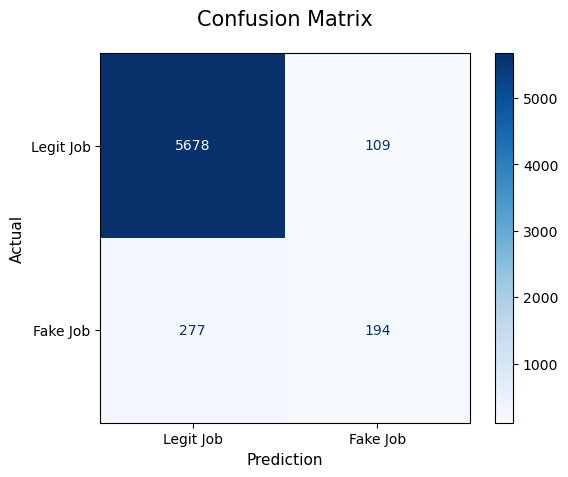

In [58]:
c_report= classification_report(gbm_b.predict(count_model.transform(X_test).toarray()), y_test)
print(c_report)

cm = confusion_matrix(gbm_b.predict(count_model.transform(X_test).toarray()), y_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Legit Job', 'Fake Job'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20) 
plt.xlabel('Prediction', fontsize=11) 
plt.ylabel('Actual', fontsize=11)
plt.show()

In [59]:
feature_importance_series = pd.Series(gbm_b.feature_importances_, index = gbm_b.feature_names_in_)
feature_importance_series.sort_values(ascending=False)

bachelor       0.072210
nan            0.051214
engineering    0.044933
care           0.041545
associate      0.036492
                 ...   
advertising    0.000021
effectively    0.000021
get            0.000000
analytical     0.000000
track          0.000000
Length: 173, dtype: float64

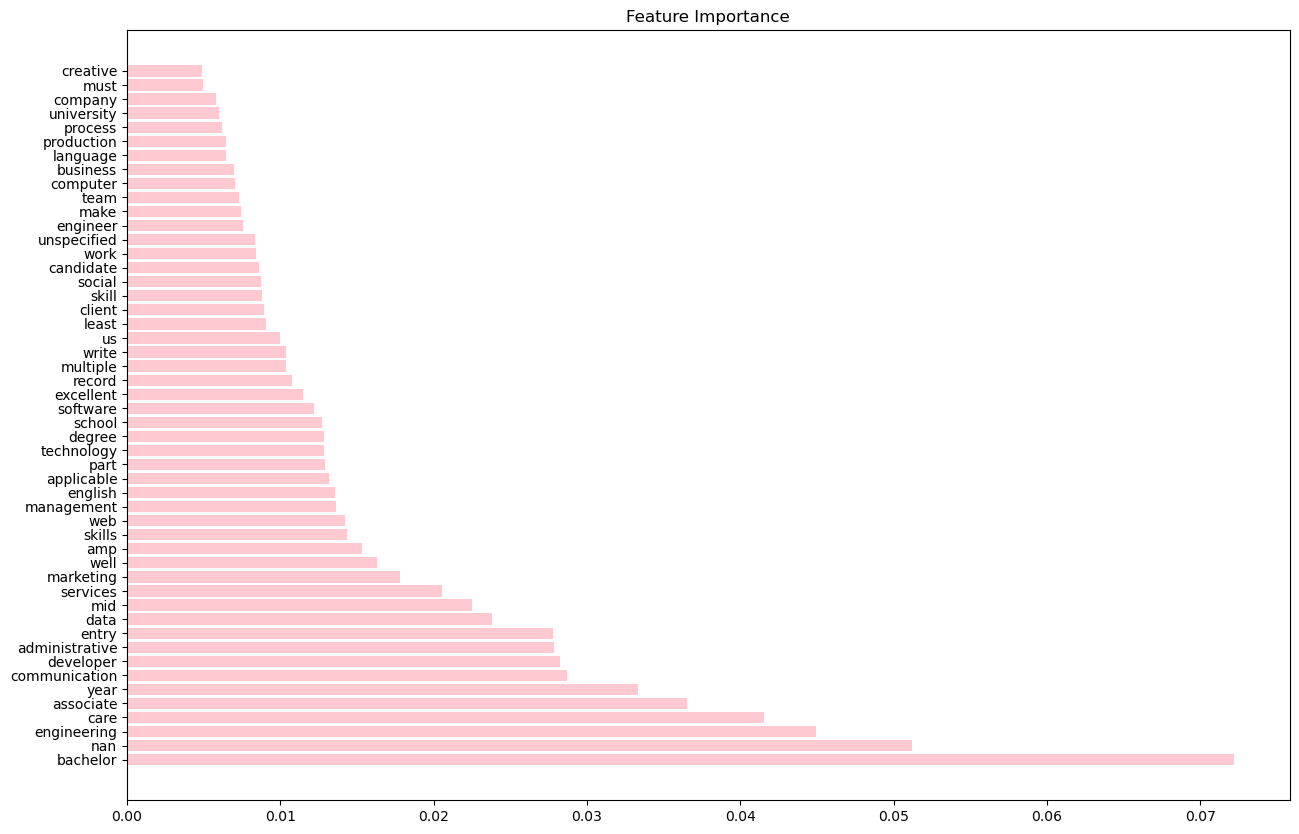

In [60]:
feat_imp_plot_top20 = feature_importance_series.sort_values(ascending=False).head(50)

fig,ax = plt.subplots(figsize = (15,10))
plt.barh(feat_imp_plot_top20.index, feat_imp_plot_top20, alpha = 0.85, color = 'pink')
plt.title('Feature Importance')
plt.show()

c:\Users\Mund\Anaconda3\envs\nlp_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Mund\Anaconda3\envs\nlp_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


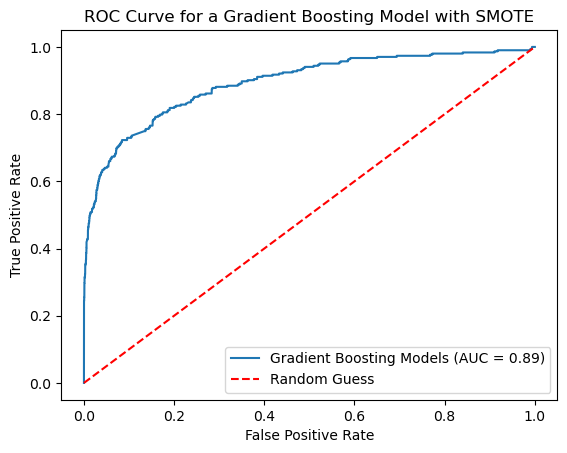

In [61]:
auc = roc_auc_score(y_test, gbm_b.predict_proba(count_model.transform(X_test).toarray())[:,1])

fpr, tpr, _ = roc_curve(y_test, gbm_b.predict_proba(count_model.transform(X_test).toarray())[:,1])
plt.plot(fpr, tpr, label=f'Gradient Boosting Models (AUC = {auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for a Gradient Boosting Model with SMOTE')
plt.legend()
plt.show()

#### About the model: 
- Its interesting that although there are few hyperparameters used, we still achieved a good performance.
- Best parameters used were {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120} with cross-validation test score of 0.96.


In [62]:
# Dump to pickle File
with open('../model/model.pkl', 'wb') as model_file:
    pickle.dump(gbm_b, model_file)